In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
df = pd.read_csv('C:/Users/User/Documents/Flatiron/Phase2/cleaned_data.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21142 entries, 0 to 21141
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21142 non-null  int64  
 1   id             21142 non-null  int64  
 2   Month          21142 non-null  int64  
 3   price          21142 non-null  int64  
 4   bedrooms       21142 non-null  int64  
 5   bathrooms      21142 non-null  float64
 6   sqft_living    21142 non-null  int64  
 7   sqft_lot       21142 non-null  int64  
 8   floors         21142 non-null  float64
 9   waterfront     18803 non-null  float64
 10  view           21081 non-null  float64
 11  condition      21142 non-null  int64  
 12  grade          21142 non-null  int64  
 13  sqft_above     21142 non-null  int64  
 14  sqft_basement  21142 non-null  int64  
 15  yr_built       21142 non-null  int64  
 16  has_renovated  21142 non-null  int64  
 17  zipcode        21142 non-null  int64  
 18  lat   

In [3]:
df.head()

,Unnamed: 0,id,Month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,has_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,10,221900,3,1.00,1180,5650,1.0,NaN,...,7,1180,0,1950,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,12,538000,3,2.25,2570,7242,2.0,0.0,...,7,2170,400,1950,1,98125,47.7210,-122.319,1690,7639
2,2,5631500400,2,180000,2,1.00,770,10000,1.0,0.0,...,6,770,0,1930,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,12,604000,4,3.00,1960,5000,1.0,0.0,...,7,1050,910,1960,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,2,510000,3,2.00,1680,8080,1.0,0.0,...,8,1680,0,1980,0,98074,47.6168,-122.045,1800,7503


In [4]:
df1 = df.drop(columns = ['Unnamed: 0'])
df1

,id,Month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,has_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10,221900,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0,1950,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12,538000,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400,1950,1,98125,47.7210,-122.319,1690,7639
2,5631500400,2,180000,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0,1930,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12,604000,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910,1960,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2,510000,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0,1980,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21137,263000018,5,360000,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0,2000,0,98103,47.6993,-122.346,1530,1509
21138,6600060120,2,400000,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0,2010,0,98146,47.5107,-122.362,1830,7200
21139,1523300141,6,402101,2,1.00,1020,1350,2.0,0.0,0.0,...,7,1020,0,2000,0,98144,47.5944,-122.299,1020,2007
21140,291310100,1,400000,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0,2000,0,98027,47.5345,-122.069,1410,1287


In [5]:
df1['view'] = df['view'].fillna(0.0).astype(int)

In [6]:
df1

,id,Month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,has_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10,221900,3,1.00,1180,5650,1.0,NaN,0,...,7,1180,0,1950,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12,538000,3,2.25,2570,7242,2.0,0.0,0,...,7,2170,400,1950,1,98125,47.7210,-122.319,1690,7639
2,5631500400,2,180000,2,1.00,770,10000,1.0,0.0,0,...,6,770,0,1930,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12,604000,4,3.00,1960,5000,1.0,0.0,0,...,7,1050,910,1960,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2,510000,3,2.00,1680,8080,1.0,0.0,0,...,8,1680,0,1980,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21137,263000018,5,360000,3,2.50,1530,1131,3.0,0.0,0,...,8,1530,0,2000,0,98103,47.6993,-122.346,1530,1509
21138,6600060120,2,400000,4,2.50,2310,5813,2.0,0.0,0,...,8,2310,0,2010,0,98146,47.5107,-122.362,1830,7200
21139,1523300141,6,402101,2,1.00,1020,1350,2.0,0.0,0,...,7,1020,0,2000,0,98144,47.5944,-122.299,1020,2007
21140,291310100,1,400000,3,2.50,1600,2388,2.0,NaN,0,...,8,1600,0,2000,0,98027,47.5345,-122.069,1410,1287


# Exploration

In [7]:
df1.corr()

,id,Month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,has_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.010979,-0.015786,0.003727,0.005988,-0.011739,-0.132278,0.019249,-0.003412,0.013017,...,0.008661,-0.010599,-0.004525,0.021152,-0.009236,-0.011167,-0.004695,0.021344,-0.003073,-0.138018
Month,-0.010979,1.000000,-0.010232,-0.001271,0.008024,0.011559,-0.001713,0.013897,0.009561,-0.003674,...,0.008566,0.009048,0.007057,-0.006114,0.007644,-0.000275,0.016678,-0.008945,0.001809,0.002458
price,-0.015786,-0.010232,1.000000,0.316573,0.526103,0.702340,0.087940,0.256372,0.278086,0.394890,...,0.667751,0.605167,0.325003,0.055830,0.116417,-0.053173,0.306502,0.022112,0.586441,0.083196
bedrooms,0.003727,-0.001271,0.316573,1.000000,0.526589,0.593340,0.033418,0.184979,0.000041,0.082702,...,0.366745,0.492695,0.309298,0.162183,0.018940,-0.157202,-0.011191,0.135692,0.403859,0.031707
bathrooms,0.005988,0.008024,0.526103,0.526589,1.000000,0.755212,0.088072,0.504108,0.069321,0.187375,...,0.665735,0.686383,0.282712,0.506905,0.047640,-0.204320,0.024950,0.224822,0.570318,0.089150
sqft_living,-0.011739,0.011559,0.702340,0.593340,0.755212,1.000000,0.172937,0.354675,0.111725,0.282945,...,0.763098,0.876679,0.434598,0.319761,0.049729,-0.198897,0.053009,0.240782,0.756387,0.184460
sqft_lot,-0.132278,-0.001713,0.087940,0.033418,0.088072,0.172937,1.000000,-0.007531,0.022578,0.072417,...,0.113397,0.183456,0.015540,0.054259,0.004278,-0.129351,-0.085449,0.230578,0.143421,0.720648
floors,0.019249,0.013897,0.256372,0.184979,0.504108,0.354675,-0.007531,1.000000,0.021367,0.027714,...,0.459202,0.524207,-0.245123,0.489594,0.003435,-0.058957,0.049018,0.125890,0.280264,-0.011558
waterfront,-0.003412,0.009561,0.278086,0.000041,0.069321,0.111725,0.022578,0.021367,1.000000,0.403263,...,0.088204,0.075918,0.090204,-0.024903,0.075678,0.030284,-0.012120,-0.038546,0.090323,0.031602
view,0.013017,-0.003674,0.394890,0.082702,0.187375,0.282945,0.072417,0.027714,0.403263,1.000000,...,0.249348,0.166601,0.275453,-0.053722,0.088490,0.085105,0.006388,-0.076133,0.280275,0.072551


<AxesSubplot:>

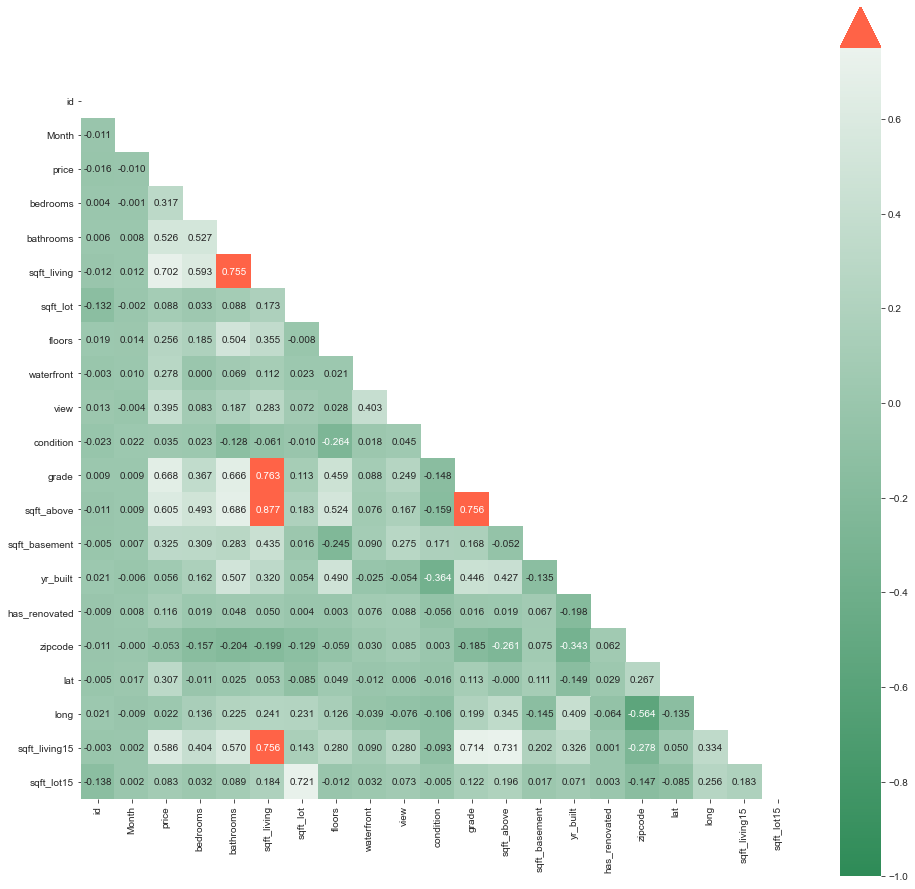

In [8]:
sns.set_style('ticks')
corr = df1.corr()
matrix = np.triu(corr)
green = sns.light_palette('seagreen', reverse=True, as_cmap=True)
green.set_over('tomato')
plt.figure(figsize=(16,16))
sns.heatmap(corr, square=True, annot=True, fmt='.3f', cmap=green, vmin=-1, vmax=.75, cbar_kws={'extend':'max'}, mask=matrix)

## Observations:
1. The first thing I want to check for is multicollinearity between the different variables listed in the heatmap above to avoid large standard erros in my calculations, and to drop key columns with high multicollinearity. This is essential because high multicollinearity between two variables will not provide much insight into the impact of the independent variable on the dependent variable, and vice versa. I will set the cut off for high multicollinearity at <b>0.75</b> as highlighted by the red cells.
2. There are some variables that are somewhat redundant. The information between ```sqft_living``` and ```sqft_living15``` for example have a high degree of multicollinearity due to the similar definitions of these variables.
3. There is high collinearity between ```sqft_living``` and ```bathrooms```, but these variables will not be removed because of their significance with the remaining variables which will be fundamental when conducting my analysis. 
4. Later when I conduct case by case analysis, I will need to compare the results to the heatmap above to see if the pattern of multicollinearity of my case by case analysis differs greatly. If it does, then there will be large errors in my predictions and I will have to review and revise my analysis accordingly.

In [9]:
# Based on observations (1) and (2), I will remove the following columns: ```sqft_above```,
# ```sqft_living15```, ```sqft_lot15```. 
# I will not be removing ```sqft_living``` even though its collinearity with three variables is high because
# it is a key variable of interest that will be analyzed later.
df1.drop(columns = {'sqft_above', 'sqft_living15', 'sqft_lot15'}, axis = 1, inplace = True)
df1

,id,Month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,has_renovated,zipcode,lat,long
0,7129300520,10,221900,3,1.00,1180,5650,1.0,NaN,0,3,7,0,1950,0,98178,47.5112,-122.257
1,6414100192,12,538000,3,2.25,2570,7242,2.0,0.0,0,3,7,400,1950,1,98125,47.7210,-122.319
2,5631500400,2,180000,2,1.00,770,10000,1.0,0.0,0,3,6,0,1930,0,98028,47.7379,-122.233
3,2487200875,12,604000,4,3.00,1960,5000,1.0,0.0,0,5,7,910,1960,0,98136,47.5208,-122.393
4,1954400510,2,510000,3,2.00,1680,8080,1.0,0.0,0,3,8,0,1980,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21137,263000018,5,360000,3,2.50,1530,1131,3.0,0.0,0,3,8,0,2000,0,98103,47.6993,-122.346
21138,6600060120,2,400000,4,2.50,2310,5813,2.0,0.0,0,3,8,0,2010,0,98146,47.5107,-122.362
21139,1523300141,6,402101,2,1.00,1020,1350,2.0,0.0,0,3,7,0,2000,0,98144,47.5944,-122.299
21140,291310100,1,400000,3,2.50,1600,2388,2.0,NaN,0,3,8,0,2000,0,98027,47.5345,-122.069


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21142 entries, 0 to 21141
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21142 non-null  int64  
 1   Month          21142 non-null  int64  
 2   price          21142 non-null  int64  
 3   bedrooms       21142 non-null  int64  
 4   bathrooms      21142 non-null  float64
 5   sqft_living    21142 non-null  int64  
 6   sqft_lot       21142 non-null  int64  
 7   floors         21142 non-null  float64
 8   waterfront     18803 non-null  float64
 9   view           21142 non-null  int32  
 10  condition      21142 non-null  int64  
 11  grade          21142 non-null  int64  
 12  sqft_basement  21142 non-null  int64  
 13  yr_built       21142 non-null  int64  
 14  has_renovated  21142 non-null  int64  
 15  zipcode        21142 non-null  int64  
 16  lat            21142 non-null  float64
 17  long           21142 non-null  float64
dtypes: flo

## Differentiating Categorical and Continuous Variables

It is essential to understand if the different variables I am about to work with are continuous or categorical. I will not be able to use continuous variables when I utilize them as predictors of my target variable.   

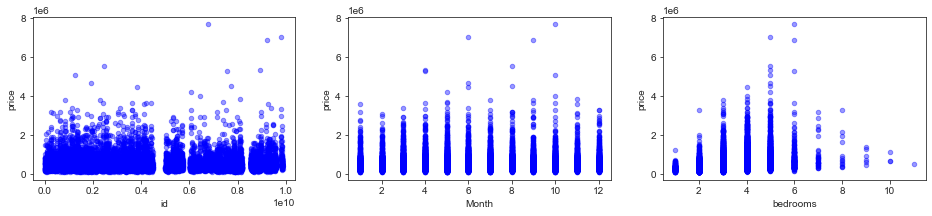

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['id', 'Month', 'bedrooms'], axes):
    df1.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

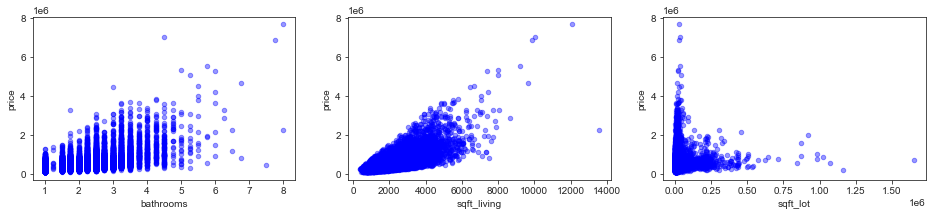

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['bathrooms', 'sqft_living', 'sqft_lot'], axes):
    df1.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

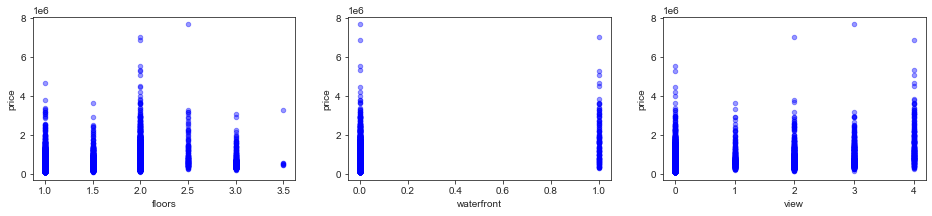

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['floors', 'waterfront', 'view'], axes):
    df1.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

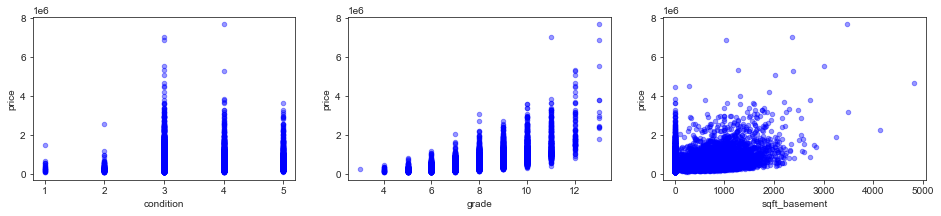

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['condition', 'grade', 'sqft_basement'], axes):
    df1.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

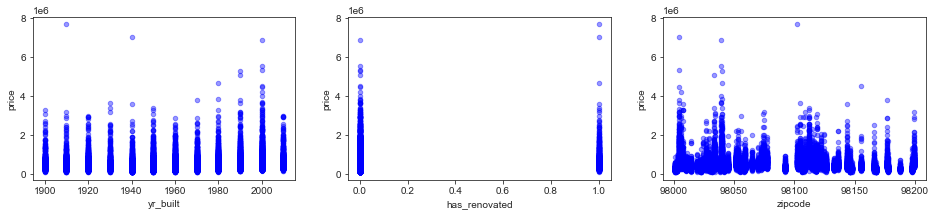

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['yr_built', 'has_renovated', 'zipcode'], axes):
    df1.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

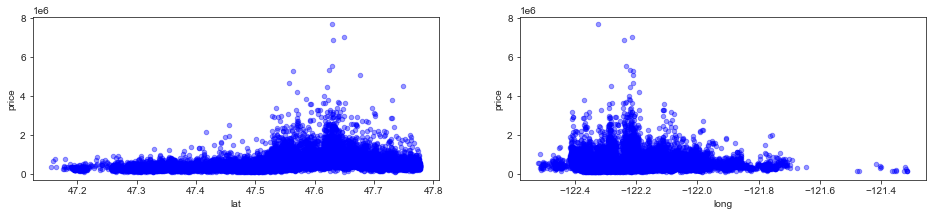

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['lat', 'long'], axes):
    df1.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

Based on this test of continuity, the following variables have been identified to be categorical:
- Month
- Bedrooms
- Bathrooms
- Floors
- Waterfront
- View
- Condition
- Grade
- Year Built
- Has Renovated
- Zipcode

Since the ```Price``` variable has been identified as the categorical variable in my analysis, it is difficult to conduct linear regression analysis on two continuous variables. So the categorical variables identified above must be adjusted to be continuous as much as possible.

## Converting Categorical to Continuous: Dummies
### Additional Data Cleaning

### Months

In [17]:
# Next, I want to create 4 categories to define the months more clearly: Q1, Q2, Q3, and Q4.
df1['Month'].replace({1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 3, 8: 3, 9: 3, 10: 4, 11: 4, 12: 4}, inplace = True)
#month_dummies = pd.get_dummies(df1.Month,prefix = 'Month', drop_first = True)
#month_dummies.info()

In [18]:
df1.Month.value_counts()

2    6682
3    5787
4    4661
1    4012
Name: Month, dtype: int64

In [19]:
months = ['1.Q1', '2.Q2', '3.Q3', '4.Q4']
months_series = pd.Series(months)
cat_months = months_series.astype('category')
cat_months

0    1.Q1
1    2.Q2
2    3.Q3
3    4.Q4
dtype: category
Categories (4, object): ['1.Q1', '2.Q2', '3.Q3', '4.Q4']

In [20]:
cat_months.cat.codes

0    0
1    1
2    2
3    3
dtype: int8

In [21]:
lb_make = LabelEncoder()
months_encoded = lb_make.fit_transform(cat_months)
months_encoded

array([0, 1, 2, 3])

In [22]:
months_df = pd.get_dummies(cat_months, drop_first=True)
months_df

,2.Q2,3.Q3,4.Q4
0,0,0,0
1,1,0,0
2,0,1,0
3,0,0,1


In [23]:
df1['quarter_bins'] = pd.cut(df1.Month, bins = (0,1,2,3,4), labels = ['1.Q1', '2.Q2', '3.Q3', '4.Q4'])
df1.quarter_bins.value_counts()

2.Q2    6682
3.Q3    5787
4.Q4    4661
1.Q1    4012
Name: quarter_bins, dtype: int64

In [24]:
months_dummies = pd.get_dummies(df1['quarter_bins'], prefix = 'quarter', drop_first=True)
months_dummies

,quarter_2.Q2,quarter_3.Q3,quarter_4.Q4
0,0,0,1
1,0,0,1
2,0,0,0
3,0,0,1
4,0,0,0
...,...,...,...
21137,1,0,0
21138,0,0,0
21139,1,0,0
21140,0,0,0


### Bedrooms

In [25]:
#bedrooms_dummies = pd.get_dummies(df1.bedrooms,prefix = 'Bedrooms', drop_first = True)
#bedrooms_dummies.info()

In [26]:
#df1.bedrooms.value_counts()

In [27]:
# Next, I want to categorize house's sizes by the number of bedrooms they have.
# Small houses are defined as homes with 1-2 bedrooms.
# Medium houses are defined as homes with 3-5 bedrooms.
# Large houses are defined as homes with 6+ bedrooms.
bedrooms = ['1.Small', '2.Medium', '3.Large']
bedrooms_series = pd.Series(bedrooms)
cat_bedrooms = bedrooms_series.astype('category')
cat_bedrooms

0     1.Small
1    2.Medium
2     3.Large
dtype: category
Categories (3, object): ['1.Small', '2.Medium', '3.Large']

In [28]:
cat_bedrooms.cat.codes

0    0
1    1
2    2
dtype: int8

In [29]:
lb_make = LabelEncoder()
bedrooms_encoded = lb_make.fit_transform(cat_bedrooms)
bedrooms_encoded

array([0, 1, 2])

In [30]:
bedrooms_df = pd.get_dummies(cat_bedrooms, drop_first=True)
bedrooms_df

,2.Medium,3.Large
0,0,0
1,1,0
2,0,1


In [31]:
df1['bedroom_bins'] = pd.cut(df1.bedrooms, bins = (0, 2, 5, 11), labels = ['1.Small', '2.Medium', '3.Large'] )
df1.bedroom_bins.value_counts()

2.Medium    17939
1.Small      2882
3.Large       321
Name: bedroom_bins, dtype: int64

In [32]:
bedrooms_dummies = pd.get_dummies(df1['bedroom_bins'], prefix = 'bedrooms', drop_first=True)
bedrooms_dummies

,bedrooms_2.Medium,bedrooms_3.Large
0,1,0
1,1,0
2,0,0
3,1,0
4,1,0
...,...,...
21137,1,0
21138,1,0
21139,0,0
21140,1,0


### Bathrooms

In [33]:
#bathrooms_dummies = pd.get_dummies(df1.bathrooms,prefix = 'Bathrooms', drop_first = True)
#bathrooms_dummies.info()

In [34]:
#df1.bathrooms.value_counts()

In [35]:
# Next, I want to categorize house's sizes by the number of bathrooms they have.
# Small houses are defined as homes with 1-3 bathrooms.
# Medium houses are defined as homes with 4-5 bathrooms.
# Large houses are defined as homes with 6+ bathrooms.
bathrooms = ['1.Small', '2.Medium', '3.Large']
bathrooms_series = pd.Series(bathrooms)
cat_bathrooms = bathrooms_series.astype('category')
cat_bathrooms

0     1.Small
1    2.Medium
2     3.Large
dtype: category
Categories (3, object): ['1.Small', '2.Medium', '3.Large']

In [36]:
cat_bathrooms.cat.codes

0    0
1    1
2    2
dtype: int8

In [37]:
lb_make = LabelEncoder()
bathrooms_encoded = lb_make.fit_transform(cat_bathrooms)
bathrooms_encoded

array([0, 1, 2])

In [38]:
bathrooms_df = pd.get_dummies(cat_bathrooms, drop_first = True)
bathrooms_df

,2.Medium,3.Large
0,0,0
1,1,0
2,0,1


In [39]:
df1['bathrooms_bins'] = pd.cut(df1.bathrooms, bins = (0, 2, 5, 8), labels = ['1.Small', '2.Medium', '3.Large'] )
df1.bathrooms_bins.value_counts()

2.Medium    10962
1.Small     10138
3.Large        42
Name: bathrooms_bins, dtype: int64

In [40]:
bathrooms_dummies = pd.get_dummies(df1['bathrooms_bins'], prefix = 'bathroom', drop_first=True)
bathrooms_dummies

,bathroom_2.Medium,bathroom_3.Large
0,0,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
21137,1,0
21138,1,0
21139,0,0
21140,1,0


### Floors

In [41]:
#floors_dummies = pd.get_dummies(df1.floors,prefix = 'Floors', drop_first = True)
#floors_dummies.info()

In [42]:
#df1.floors.value_counts()

In [43]:
# Next, I want to categorize house's sizes by the number of floors they have.
# The categorization with this variable is a bit trickier as there can be '.5' floors. I will assume that this
# represents a basement or attic of some sort, so it would not be deemed a true livable space. As a result,
# I will round down when categorizing this variable.
# Small houses are defined as homes with 1 floor.
# Medium houses are defined as homes with 2 floors.
# Large houses are defined as homes with 3 floors.
floors = ['1.One', '2.Two', '3.Three']
floors_series = pd.Series(floors)
cat_floors = floors_series.astype('category')
cat_floors

0      1.One
1      2.Two
2    3.Three
dtype: category
Categories (3, object): ['1.One', '2.Two', '3.Three']

In [44]:
cat_floors.cat.codes

0    0
1    1
2    2
dtype: int8

In [45]:
lb_make = LabelEncoder()
floors_encoded = lb_make.fit_transform(cat_floors)
floors_encoded

array([0, 1, 2])

In [46]:
floors_df = pd.get_dummies(cat_floors, drop_first=True)
floors_df

,2.Two,3.Three
0,0,0
1,1,0
2,0,1


In [47]:
df1['floors_bins'] = pd.cut(df1.floors, bins = (0, 1.6, 2.6, 3.6), labels = ['1.One', '2.Two', '3.Three'] )
df1.floors_bins.value_counts()

1.One      12320
2.Two       8222
3.Three      600
Name: floors_bins, dtype: int64

In [48]:
df1['floors_bins']

0          1.One
1          2.Two
2          1.One
3          1.One
4          1.One
          ...   
21137    3.Three
21138      2.Two
21139      2.Two
21140      2.Two
21141      2.Two
Name: floors_bins, Length: 21142, dtype: category
Categories (3, object): ['1.One' < '2.Two' < '3.Three']

In [49]:
floor_dummies = pd.get_dummies(df1['floors_bins'], prefix = 'floors', drop_first=True)
floor_dummies

,floors_2.Two,floors_3.Three
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
21137,0,1
21138,1,0
21139,1,0
21140,1,0


### Waterfront

In [50]:
waterfront_dummies = pd.get_dummies(df1.waterfront,prefix = 'Waterfront', drop_first = True)
waterfront_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21142 entries, 0 to 21141
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Waterfront_1.0  21142 non-null  uint8
dtypes: uint8(1)
memory usage: 20.8 KB


In [51]:
df1.waterfront.value_counts()

0.0    18661
1.0      142
Name: waterfront, dtype: int64

### View

In [52]:
view_dummies = pd.get_dummies(df1.view,prefix = 'View', drop_first = True)
view_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21142 entries, 0 to 21141
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   View_1  21142 non-null  uint8
 1   View_2  21142 non-null  uint8
 2   View_3  21142 non-null  uint8
 3   View_4  21142 non-null  uint8
dtypes: uint8(4)
memory usage: 82.7 KB


In [53]:
df1.view.value_counts()

0    19078
2      930
3      496
1      327
4      311
Name: view, dtype: int64

### Condition

In [54]:
condition_dummies = pd.get_dummies(df1.condition,prefix = 'Condition', drop_first = True)
condition_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21142 entries, 0 to 21141
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Condition_2  21142 non-null  uint8
 1   Condition_3  21142 non-null  uint8
 2   Condition_4  21142 non-null  uint8
 3   Condition_5  21142 non-null  uint8
dtypes: uint8(4)
memory usage: 82.7 KB


In [55]:
df1.condition.value_counts()

3    13726
4     5557
5     1665
2      166
1       28
Name: condition, dtype: int64

### Grade

In [56]:
#grade_dummies = pd.get_dummies(df1.grade,prefix = 'Grade', drop_first = True)
#grade_dummies.info()

In [57]:
#df1.grade.value_counts()

In [58]:
# Next, I want to categorize house's quality by the grade awarded by the King's County grading system.
# Poor is defined as homes with a grade of 3-6.
# Average is defined as homes with a grade of 7-8.
# Above Average is defined as homes with a grade of 9-10.
# Excellent is defined as homes with a grade of 11+.
grade = ['1.Poor', '2.Average', '3.AboveAverage', '4.Excellent']
grade_series = pd.Series(grade)
cat_grade = grade_series.astype('category')
cat_grade

0            1.Poor
1         2.Average
2    3.AboveAverage
3       4.Excellent
dtype: category
Categories (4, object): ['1.Poor', '2.Average', '3.AboveAverage', '4.Excellent']

In [59]:
cat_grade.cat.codes

0    0
1    1
2    2
3    3
dtype: int8

In [60]:
lb_make = LabelEncoder()
grade_encoded = lb_make.fit_transform(cat_grade)

In [61]:
grade_encoded

array([0, 1, 2, 3])

In [62]:
grade_df = pd.get_dummies(cat_grade, drop_first=True)
grade_df

,2.Average,3.AboveAverage,4.Excellent
0,0,0,0
1,1,0,0
2,0,1,0
3,0,0,1


In [63]:
df1['grade_bins'] = pd.cut(df1.grade, bins = (3, 6, 8, 10, 13), labels = ['1.Poor', '2.Average', '3.AboveAverage', '4.Excellent'] )
df1.grade_bins.value_counts()

2.Average         14720
3.AboveAverage     3669
1.Poor             2259
4.Excellent         493
Name: grade_bins, dtype: int64

In [64]:
grade_dummies = pd.get_dummies(df1['grade_bins'], prefix = 'grade', drop_first=True)
grade_dummies

,grade_2.Average,grade_3.AboveAverage,grade_4.Excellent
0,1,0,0
1,1,0,0
2,0,0,0
3,1,0,0
4,1,0,0
...,...,...,...
21137,1,0,0
21138,1,0,0
21139,1,0,0
21140,1,0,0


### Year Built

In [65]:
#yr_built_dummies = pd.get_dummies(df1.yr_built,prefix = 'Year_Built', drop_first = True)
#yr_built_dummies.info()

In [66]:
#df1.yr_built.value_counts()

In [67]:
# Next, I want to categorize a house's age by the date the house was built.
# Old is defined as homes built before 1980.
# Pre-Modern is defined as homes built between 1981 and 2010.
# New is defined as homes built between 2011 and present day.
yr_built = ['1.Old', '2.Modern', '3.New']
yr_built_series = pd.Series(yr_built)
cat_yr_built = yr_built_series.astype('category')
cat_yr_built

0       1.Old
1    2.Modern
2       3.New
dtype: category
Categories (3, object): ['1.Old', '2.Modern', '3.New']

In [68]:
cat_yr_built.cat.codes

0    0
1    1
2    2
dtype: int8

In [69]:
lb_make = LabelEncoder()
yr_built_encoded = lb_make.fit_transform(cat_yr_built)

In [70]:
yr_built_encoded

array([0, 1, 2])

In [71]:
age_df = pd.get_dummies(cat_yr_built, drop_first = True)
age_df

,2.Modern,3.New
0,0,0
1,1,0
2,0,1


In [72]:
df1['age_bins'] = pd.cut(df1.yr_built, bins = (0, 1970, 2000, 2010), labels = ['1.Old', '2.Modern', '3.New'] )
df1.age_bins.value_counts()

1.Old       12079
2.Modern     7855
3.New        1208
Name: age_bins, dtype: int64

In [73]:
df1['age_bins']

0           1.Old
1           1.Old
2           1.Old
3           1.Old
4        2.Modern
           ...   
21137    2.Modern
21138       3.New
21139    2.Modern
21140    2.Modern
21141    2.Modern
Name: age_bins, Length: 21142, dtype: category
Categories (3, object): ['1.Old' < '2.Modern' < '3.New']

In [74]:
age_dummies = pd.get_dummies(df1['age_bins'], prefix = 'age', drop_first=True)
age_dummies

,age_2.Modern,age_3.New
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
21137,1,0
21138,0,1
21139,1,0
21140,1,0


### Has Renovated

In [75]:
has_renovated_dummies = pd.get_dummies(df1.has_renovated,prefix = 'Has_Renovated', drop_first = True)
has_renovated_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21142 entries, 0 to 21141
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Has_Renovated_1  21142 non-null  uint8
dtypes: uint8(1)
memory usage: 20.8 KB


In [76]:
df1.has_renovated.value_counts()

0    20419
1      723
Name: has_renovated, dtype: int64

### Zipcode

In [77]:
zipcode_dummies = pd.get_dummies(df1.zipcode,prefix = 'Zipcode', drop_first = True)
zipcode_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21142 entries, 0 to 21141
Data columns (total 69 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Zipcode_98002  21142 non-null  uint8
 1   Zipcode_98003  21142 non-null  uint8
 2   Zipcode_98004  21142 non-null  uint8
 3   Zipcode_98005  21142 non-null  uint8
 4   Zipcode_98006  21142 non-null  uint8
 5   Zipcode_98007  21142 non-null  uint8
 6   Zipcode_98008  21142 non-null  uint8
 7   Zipcode_98010  21142 non-null  uint8
 8   Zipcode_98011  21142 non-null  uint8
 9   Zipcode_98014  21142 non-null  uint8
 10  Zipcode_98019  21142 non-null  uint8
 11  Zipcode_98022  21142 non-null  uint8
 12  Zipcode_98023  21142 non-null  uint8
 13  Zipcode_98024  21142 non-null  uint8
 14  Zipcode_98027  21142 non-null  uint8
 15  Zipcode_98028  21142 non-null  uint8
 16  Zipcode_98029  21142 non-null  uint8
 17  Zipcode_98030  21142 non-null  uint8
 18  Zipcode_98031  21142 non-null  uint8
 19  Zipc

In [78]:
df1.zipcode.value_counts()

98103    587
98038    574
98115    568
98052    562
98042    542
        ... 
98102    100
98010     98
98024     79
98148     55
98039     49
Name: zipcode, Length: 70, dtype: int64

### Combining the Data

In [79]:
final_df = pd.concat([df1, months_dummies, bedrooms_dummies, bathrooms_dummies, floor_dummies, waterfront_dummies, view_dummies, condition_dummies, grade_dummies, age_dummies, has_renovated_dummies, zipcode_dummies], axis = 1)

In [80]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21142 entries, 0 to 21141
Columns: 117 entries, id to Zipcode_98199
dtypes: category(6), float64(5), int32(1), int64(12), uint8(93)
memory usage: 4.8 MB


In [81]:
final_df.head()

,id,Month,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,Zipcode_98146,Zipcode_98148,Zipcode_98155,Zipcode_98166,Zipcode_98168,Zipcode_98177,Zipcode_98178,Zipcode_98188,Zipcode_98198,Zipcode_98199
0,7129300520,4,221900,3,1.00,1180,5650,1.0,NaN,0,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,4,538000,3,2.25,2570,7242,2.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,1,180000,2,1.00,770,10000,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,4,604000,4,3.00,1960,5000,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,1,510000,3,2.00,1680,8080,1.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
list(final_df)

['id',
 'Month',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_basement',
 'yr_built',
 'has_renovated',
 'zipcode',
 'lat',
 'long',
 'quarter_bins',
 'bedroom_bins',
 'bathrooms_bins',
 'floors_bins',
 'grade_bins',
 'age_bins',
 'quarter_2.Q2',
 'quarter_3.Q3',
 'quarter_4.Q4',
 'bedrooms_2.Medium',
 'bedrooms_3.Large',
 'bathroom_2.Medium',
 'bathroom_3.Large',
 'floors_2.Two',
 'floors_3.Three',
 'Waterfront_1.0',
 'View_1',
 'View_2',
 'View_3',
 'View_4',
 'Condition_2',
 'Condition_3',
 'Condition_4',
 'Condition_5',
 'grade_2.Average',
 'grade_3.AboveAverage',
 'grade_4.Excellent',
 'age_2.Modern',
 'age_3.New',
 'Has_Renovated_1',
 'Zipcode_98002',
 'Zipcode_98003',
 'Zipcode_98004',
 'Zipcode_98005',
 'Zipcode_98006',
 'Zipcode_98007',
 'Zipcode_98008',
 'Zipcode_98010',
 'Zipcode_98011',
 'Zipcode_98014',
 'Zipcode_98019',
 'Zipcode_98022',
 'Zipcode_98023',
 'Zipcode_98024',
 'Zipcode_980

In [83]:
final_df.to_csv('final_df.csv')

In [84]:
pwd

'C:\\Users\\User\\Documents\\Flatiron\\Phase2'